In [2]:
from google.colab import files
uploaded = files.upload()


Saving 1730285881-Airbnb_Open_Data (1).xlsx to 1730285881-Airbnb_Open_Data (1).xlsx


Dataset loaded successfully: 102599 rows, 26 columns

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  o

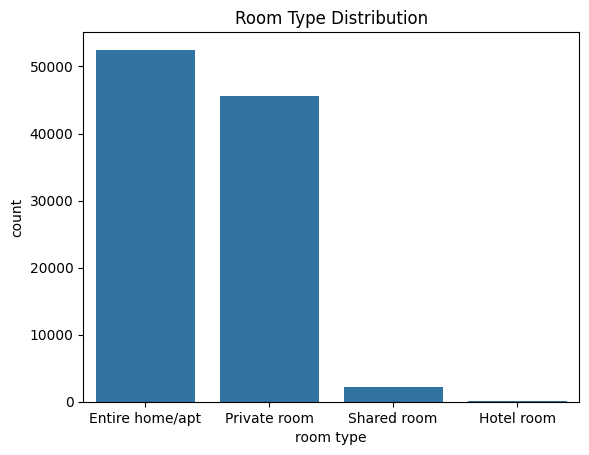


Q2: Neighbourhood Group with most listings:
neighbourhood group
Manhattan        42878
Brooklyn         40910
Queens           12968
Bronx             2661
Staten Island      935
brookln              1
manhatan             1
Name: count, dtype: int64


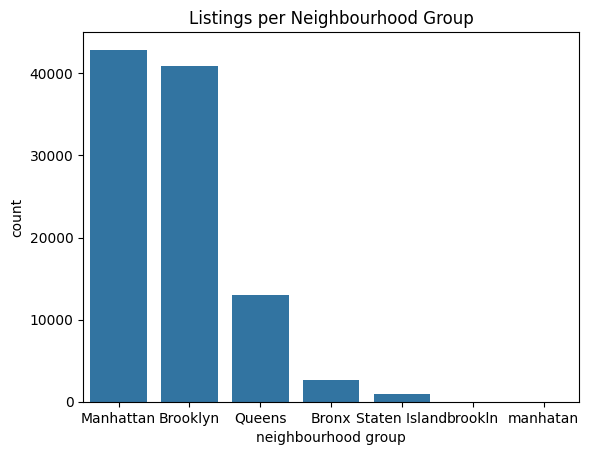


Q3: Top 10 Neighbourhoods by Average Price:
neighbourhood
New Dorp                      1045.000000
Chelsea, Staten Island        1042.000000
Fort Wadsworth                1024.000000
Jamaica Hills                  812.904762
Arden Heights                  804.888889
Mill Basin                     800.333333
Bay Terrace, Staten Island     800.000000
Midland Beach                  796.176471
Riverdale                      768.736842
East Morrisania                764.666667
Name: price, dtype: float64


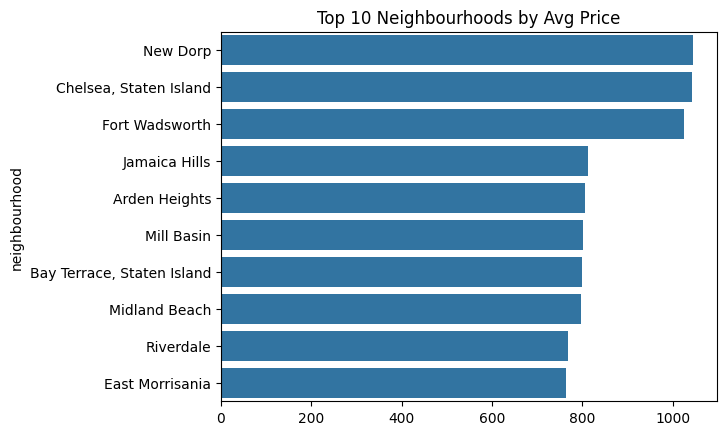

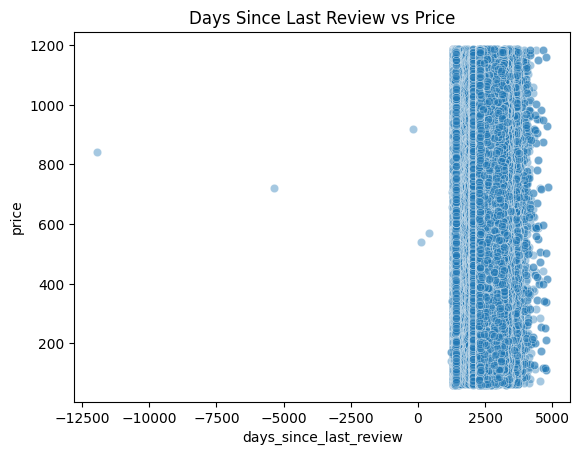


Q5: Top 10 Hosts by Listings:
host id
54164290621    2
42602444364    2
24113972708    2
74086768970    2
48983770080    2
70521018180    2
94459587561    2
862834181      2
2854580082     2
65519636966    2
Name: count, dtype: int64


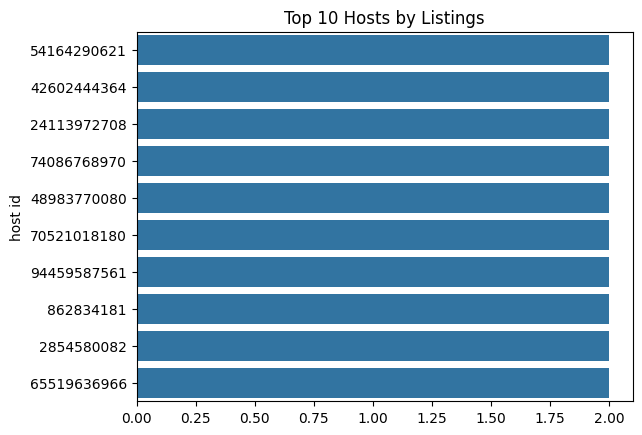


Q6: Review scores by Host Verification:
host_identity_verified
unconfirmed    27.587559
verified       27.310099
Name: number of reviews, dtype: float64


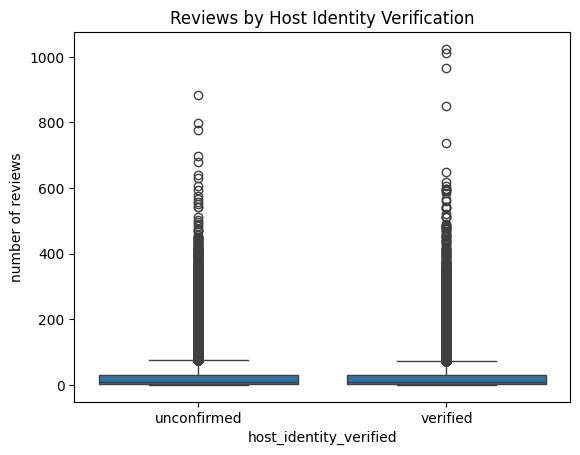


Q7: Correlation between Price and Service Fee:
               price  service fee
price        1.00000      0.99999
service fee  0.99999      1.00000


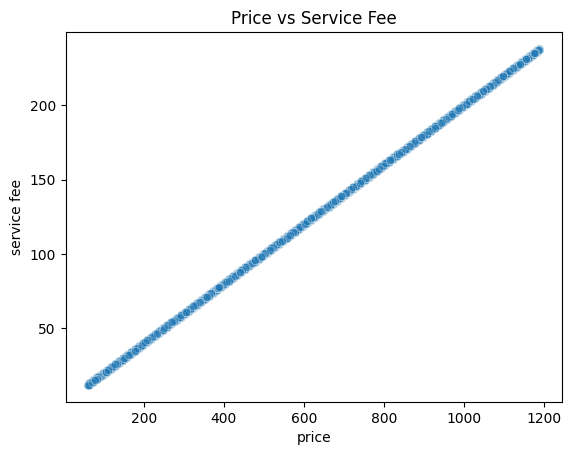


Analysis Completed Successfully!


In [5]:
"""
Airbnb Hotel Booking Analysis - Jupyter Notebook Style Script

This script will:
- Load the Airbnb dataset (NYC dataset like AB_NYC_2019.csv)
- Clean and preprocess the data
- Perform exploratory data analysis (EDA)
- Answer the research questions from your problem statement
- Generate visualizations for insights

Dependencies: pandas, numpy, matplotlib, seaborn
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# === Step 1: Load Dataset ===
# CSV_PATH = "AB_NYC_2019.csv"  # Change to your dataset filename
EXCEL_PATH = list(uploaded.keys())[0] # Get the uploaded Excel file name

try:
    # df = pd.read_csv(CSV_PATH)
    df = pd.read_excel(EXCEL_PATH) # Read the Excel file
    print(f"Dataset loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("Dataset not found. Please check the file path and try again.")

# === Step 2: Basic Information ===
print("\n=== Dataset Info ===")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())
print("\nColumn Names:\n", df.columns)

# === Step 3: Data Cleaning ===
# Convert last_review to datetime
if "last review" in df.columns:
    df["last review"] = pd.to_datetime(df["last review"], errors="coerce")

# Remove zero and extreme prices
print("\nBefore cleaning:", df.shape)
df = df[df["price"] > 0]
q_low, q_high = df["price"].quantile([0.01, 0.99])
df = df[(df["price"] >= q_low) & (df["price"] <= q_high)]
print("After cleaning:", df.shape)

# === Step 4: Research Questions ===

# Q1: Different property (room) types
print("\nQ1: Room Types:")
print(df["room type"].value_counts())
sns.countplot(data=df, x="room type", order=df["room type"].value_counts().index)
plt.title("Room Type Distribution")
plt.show()

# Q2: Neighbourhood group with most listings
print("\nQ2: Neighbourhood Group with most listings:")
print(df["neighbourhood group"].value_counts())
sns.countplot(data=df, x="neighbourhood group", order=df["neighbourhood group"].value_counts().index)
plt.title("Listings per Neighbourhood Group")
plt.show()

# Q3: Neighbourhoods with highest average price
print("\nQ3: Top 10 Neighbourhoods by Average Price:")
print(df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10))
top_neigh = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_neigh.values, y=top_neigh.index)
plt.title("Top 10 Neighbourhoods by Avg Price")
plt.show()

# Q4: Relationship between property age and price (proxy: last_review)
if "last review" in df.columns:
    df["days_since_last_review"] = (pd.Timestamp.today() - df["last review"]).dt.days
    sns.scatterplot(data=df, x="days_since_last_review", y="price", alpha=0.4)
    plt.title("Days Since Last Review vs Price")
    plt.show()
else:
    print("\nQ4: No construction year or review date info available.")

# Q5: Top 10 Hosts by Listing Count
print("\nQ5: Top 10 Hosts by Listings:")
top_hosts = df["host id"].value_counts().head(10)
print(top_hosts)
sns.barplot(x=top_hosts.values, y=top_hosts.index.astype(str))
plt.title("Top 10 Hosts by Listings")
plt.show()

# Q6: Verified hosts vs reviews (if column exists)
if "host_identity_verified" in df.columns:
    print("\nQ6: Review scores by Host Verification:")
    print(df.groupby("host_identity_verified")["number of reviews"].mean())
    sns.boxplot(data=df, x="host_identity_verified", y="number of reviews")
    plt.title("Reviews by Host Identity Verification")
    plt.show()
else:
    print("\nQ6: No 'host_identity_verified' column found. Using reviews as proxy.")
    sns.scatterplot(data=df, x="reviews per month", y="price", alpha=0.4)
    plt.title("Reviews per Month vs Price")
    plt.show()

# Q7: Correlation between price and service fee (if column exists)
if "service fee" in df.columns:
    print("\nQ7: Correlation between Price and Service Fee:")
    print(df[["price", "service fee"]].corr())
    sns.scatterplot(data=df, x="price", y="service fee", alpha=0.4)
    plt.title("Price vs Service Fee")
    plt.show()
else:
    print("\nQ7: No 'service fee' column. Showing correlations with price instead:")
    print(df.corr(numeric_only=True)["price"].sort_values(ascending=False).head(10))
    sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()

# === Final Note ===
print("\nAnalysis Completed Successfully!")